# Project Overview

This project will assess a portfolio based on a few key metrics such as:
    - Cumulative Return
    - Average Daily Return
    - Standard Deviation of Daily Returns
    - Sharpe Ratio of Overall Portfolio
    - Final Value of Portfolio

## Our Imports

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas_datareader import data
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) #default size for our charts

## Let's First Pull Data

To pull data, we will be leveraging AlphaVantage's free service to get info on stocks and cryptocurrency. The API itself is a python library developed by RomelTorres.

- Free API: https://www.alphavantage.co/
- Python API wrapper: https://github.com/RomelTorres/alpha_vantage

In [27]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies

ts = TimeSeries(key='R9PCESGM8SQRD71G', output_format='pandas', indexing_type='date')
MSFT = ts.get_daily_adjusted('MSFT', outputsize='compact')

## Let's Explore MSFT's Data

In [28]:
MSFT[0].describe()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.0
mean,115.682450,116.607450,114.850966,115.889100,115.383618,2.593092e+07,0.009200,1.0
std,8.749102,8.790019,8.739926,8.695653,8.892454,7.873993e+06,0.064724,0.0
min,101.640000,102.871600,100.980000,102.050000,101.244200,5.824333e+06,0.000000,1.0
25%,106.975000,107.657500,105.947500,107.087500,106.256825,2.148057e+07,0.000000,1.0
50%,116.847500,117.810000,116.090000,116.990000,116.564500,2.558515e+07,0.000000,1.0
75%,124.102500,125.557500,123.602500,124.782500,124.346125,2.990772e+07,0.000000,1.0
max,130.530000,131.370000,129.394700,130.600000,130.125000,5.563639e+07,0.460000,1.0


In [29]:
MSFT[0].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2019-01-07,101.64,103.2681,100.9800,102.06,101.2541,35656136.0,0.0,1.0
2019-01-08,103.04,103.9700,101.7134,102.80,101.9883,31514415.0,0.0,1.0
2019-01-09,103.86,104.8800,103.2445,104.27,103.4467,32280840.0,0.0,1.0
2019-01-10,103.22,103.7500,102.3800,103.60,102.7820,30067556.0,0.0,1.0
2019-01-11,103.19,103.4400,101.6400,102.80,101.9883,28314202.0,0.0,1.0


## Let's Plot This Data

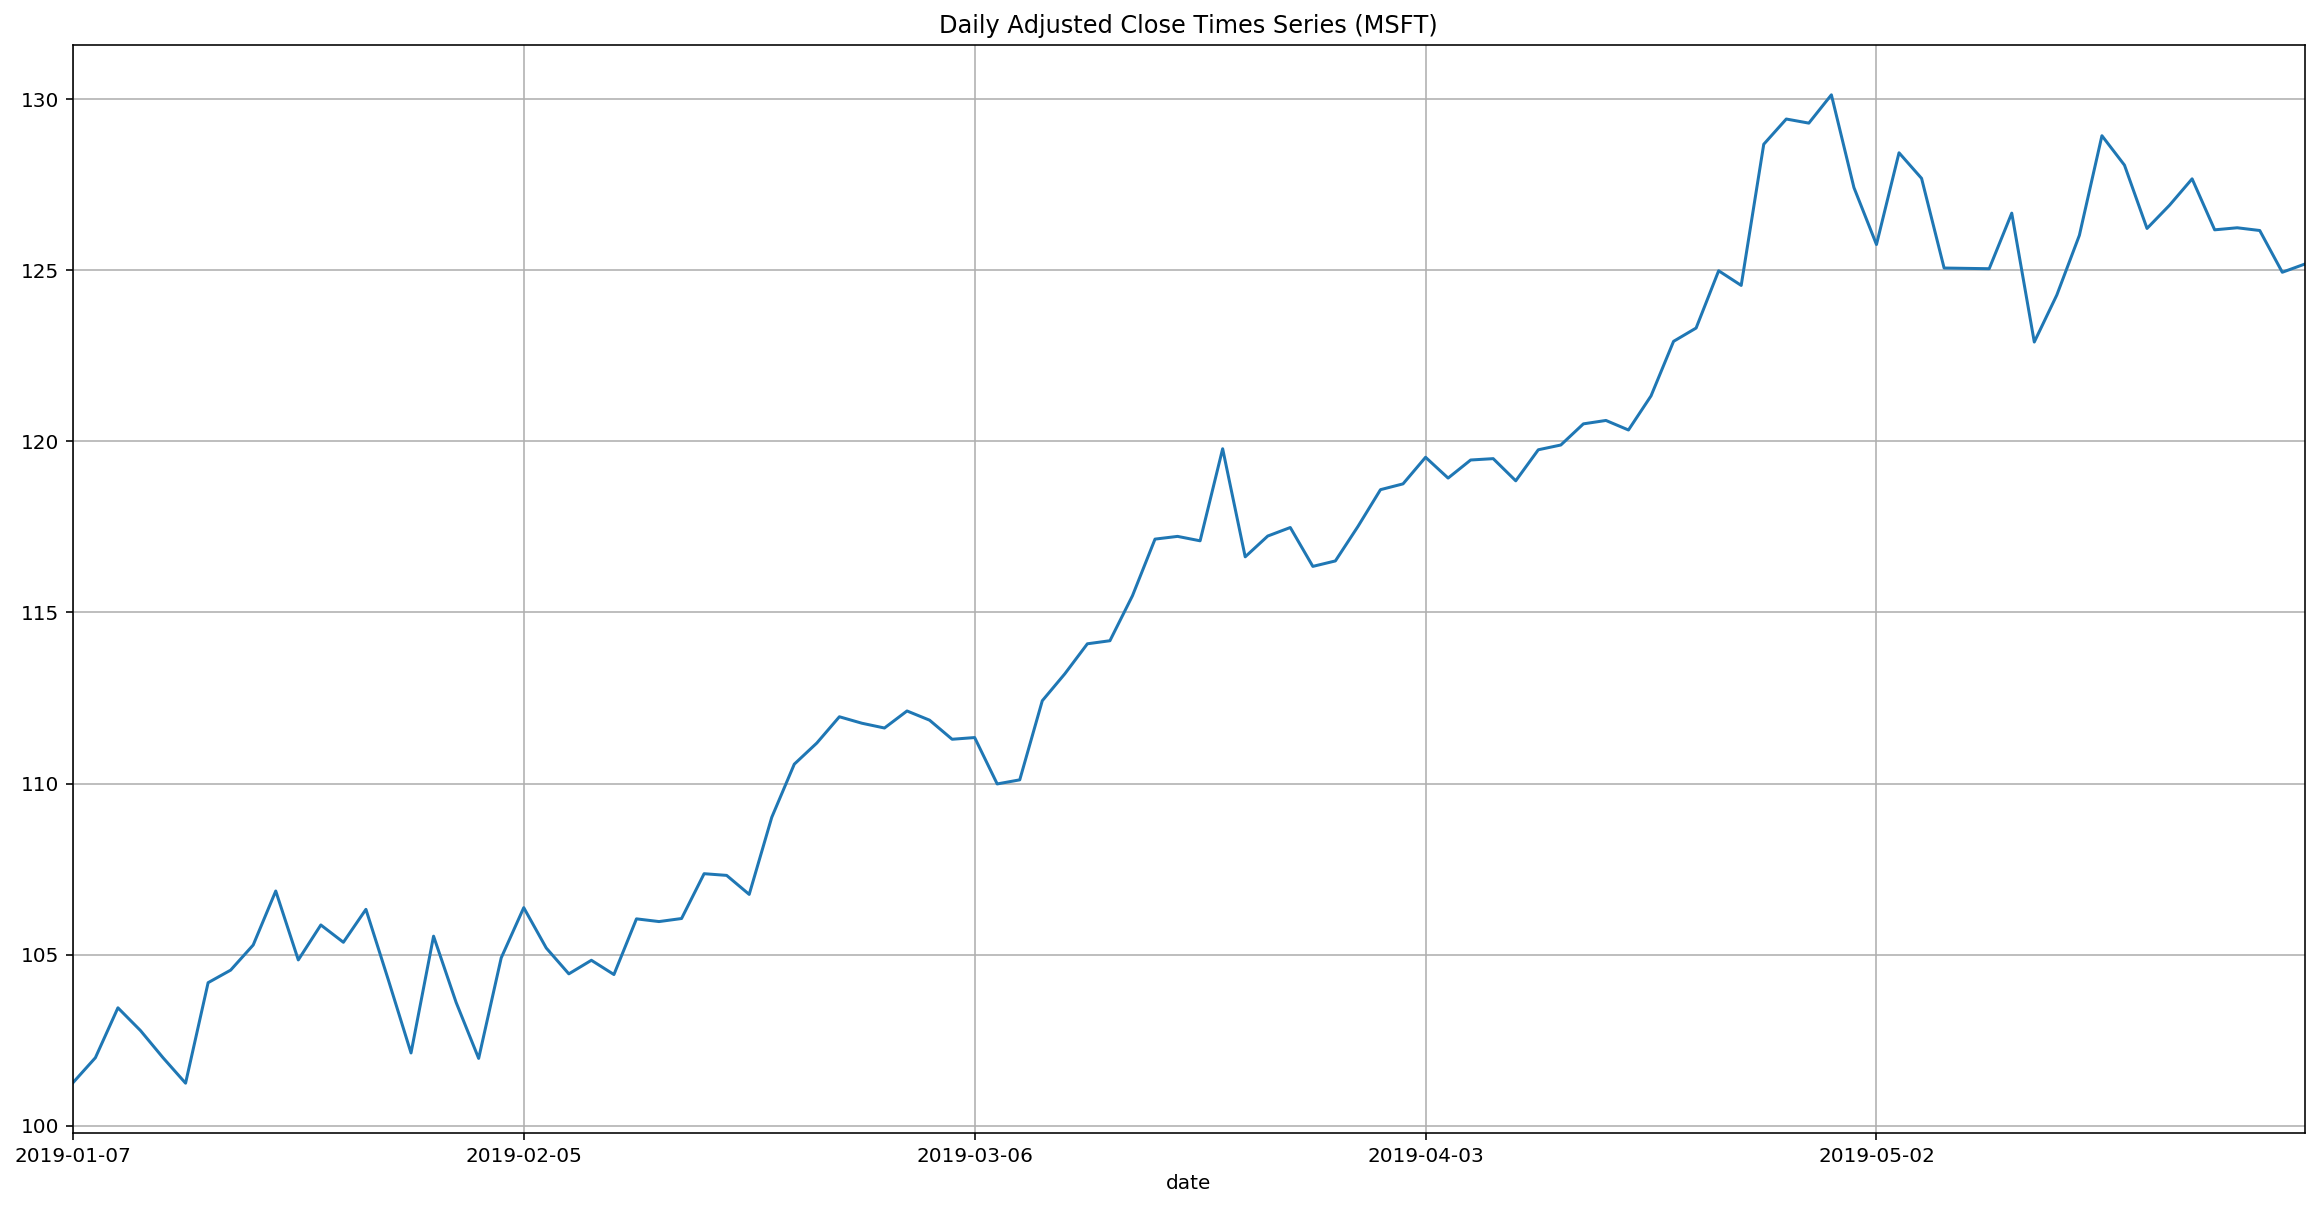

In [30]:
MSFT[0]['5. adjusted close'].plot()
plt.title('Daily Adjusted Close Times Series (MSFT)')
plt.grid()
plt.show()

## Let's Compare to the S&P 500

We Compare to the S&P 500 because it provides a broader view of the economic health of the United States. It is also a market cap-weighted index which allows for larger companies to have an influence over the index. It essentially provides a better overall representation of the stock market in comparison to the Dow Jones Industrial average.

In [31]:
SPY = ts.get_daily_adjusted('SPY', outputsize='compact')

In [32]:
SPY[0].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2019-01-07,252.69,255.9500,251.69,254.38,253.2698,103139100.0,0.0,1.0
2019-01-08,256.82,257.3100,254.00,256.77,255.6494,102512587.0,0.0,1.0
2019-01-09,257.56,258.9100,256.19,257.97,256.8441,95006554.0,0.0,1.0
2019-01-10,256.26,259.1600,255.50,258.88,257.7502,96823923.0,0.0,1.0
2019-01-11,257.68,259.0098,257.03,258.98,257.8497,73858110.0,0.0,1.0


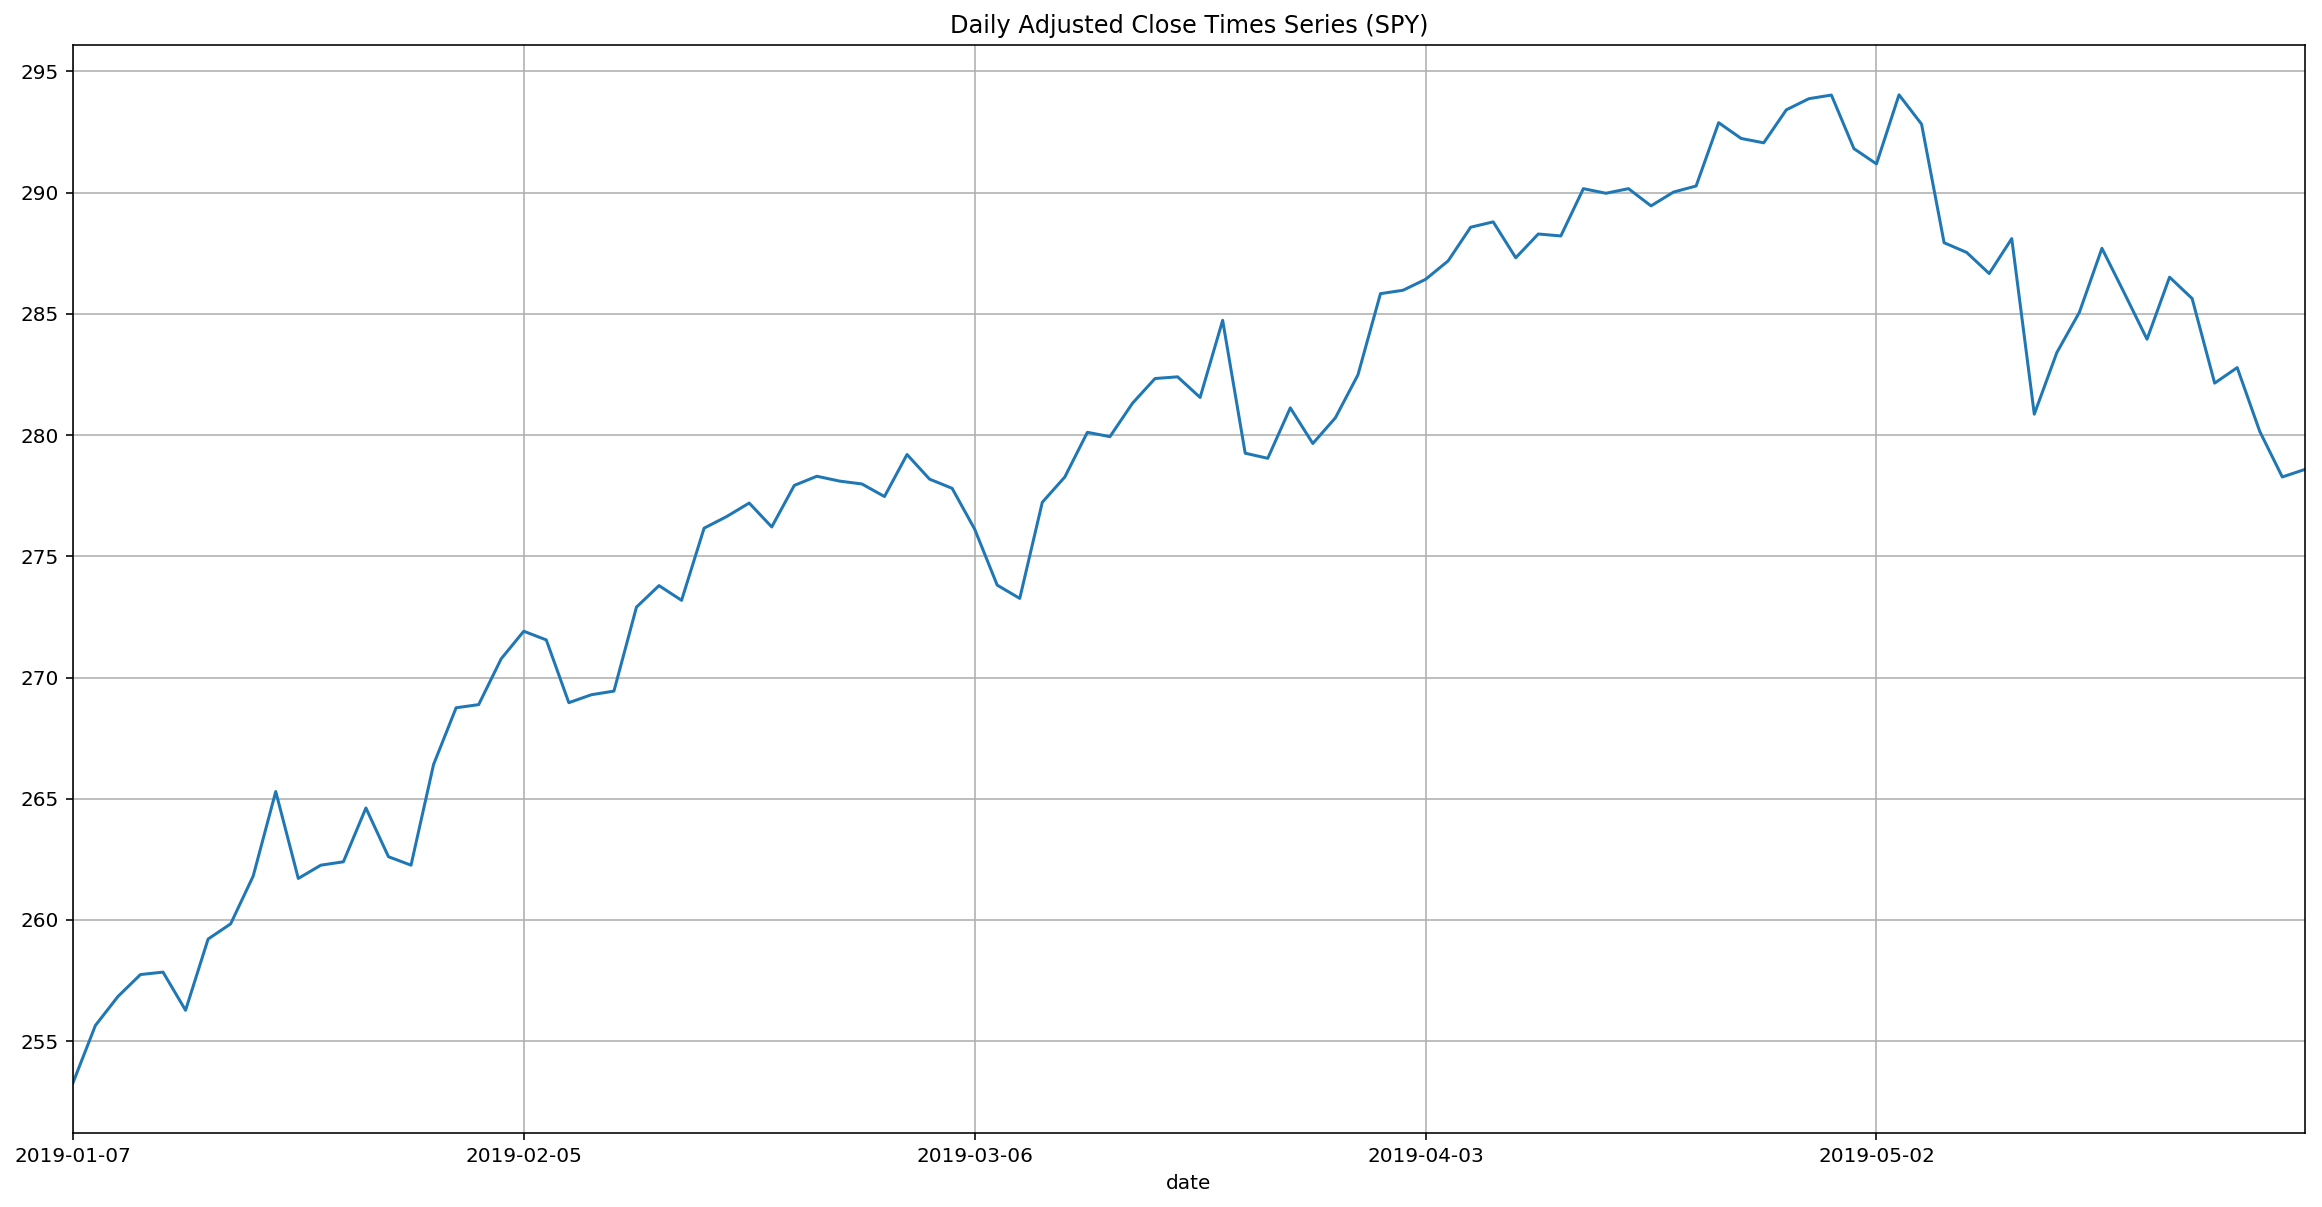

In [33]:
SPY[0]['5. adjusted close'].plot()
plt.title('Daily Adjusted Close Times Series (SPY)')
plt.grid()
plt.show()

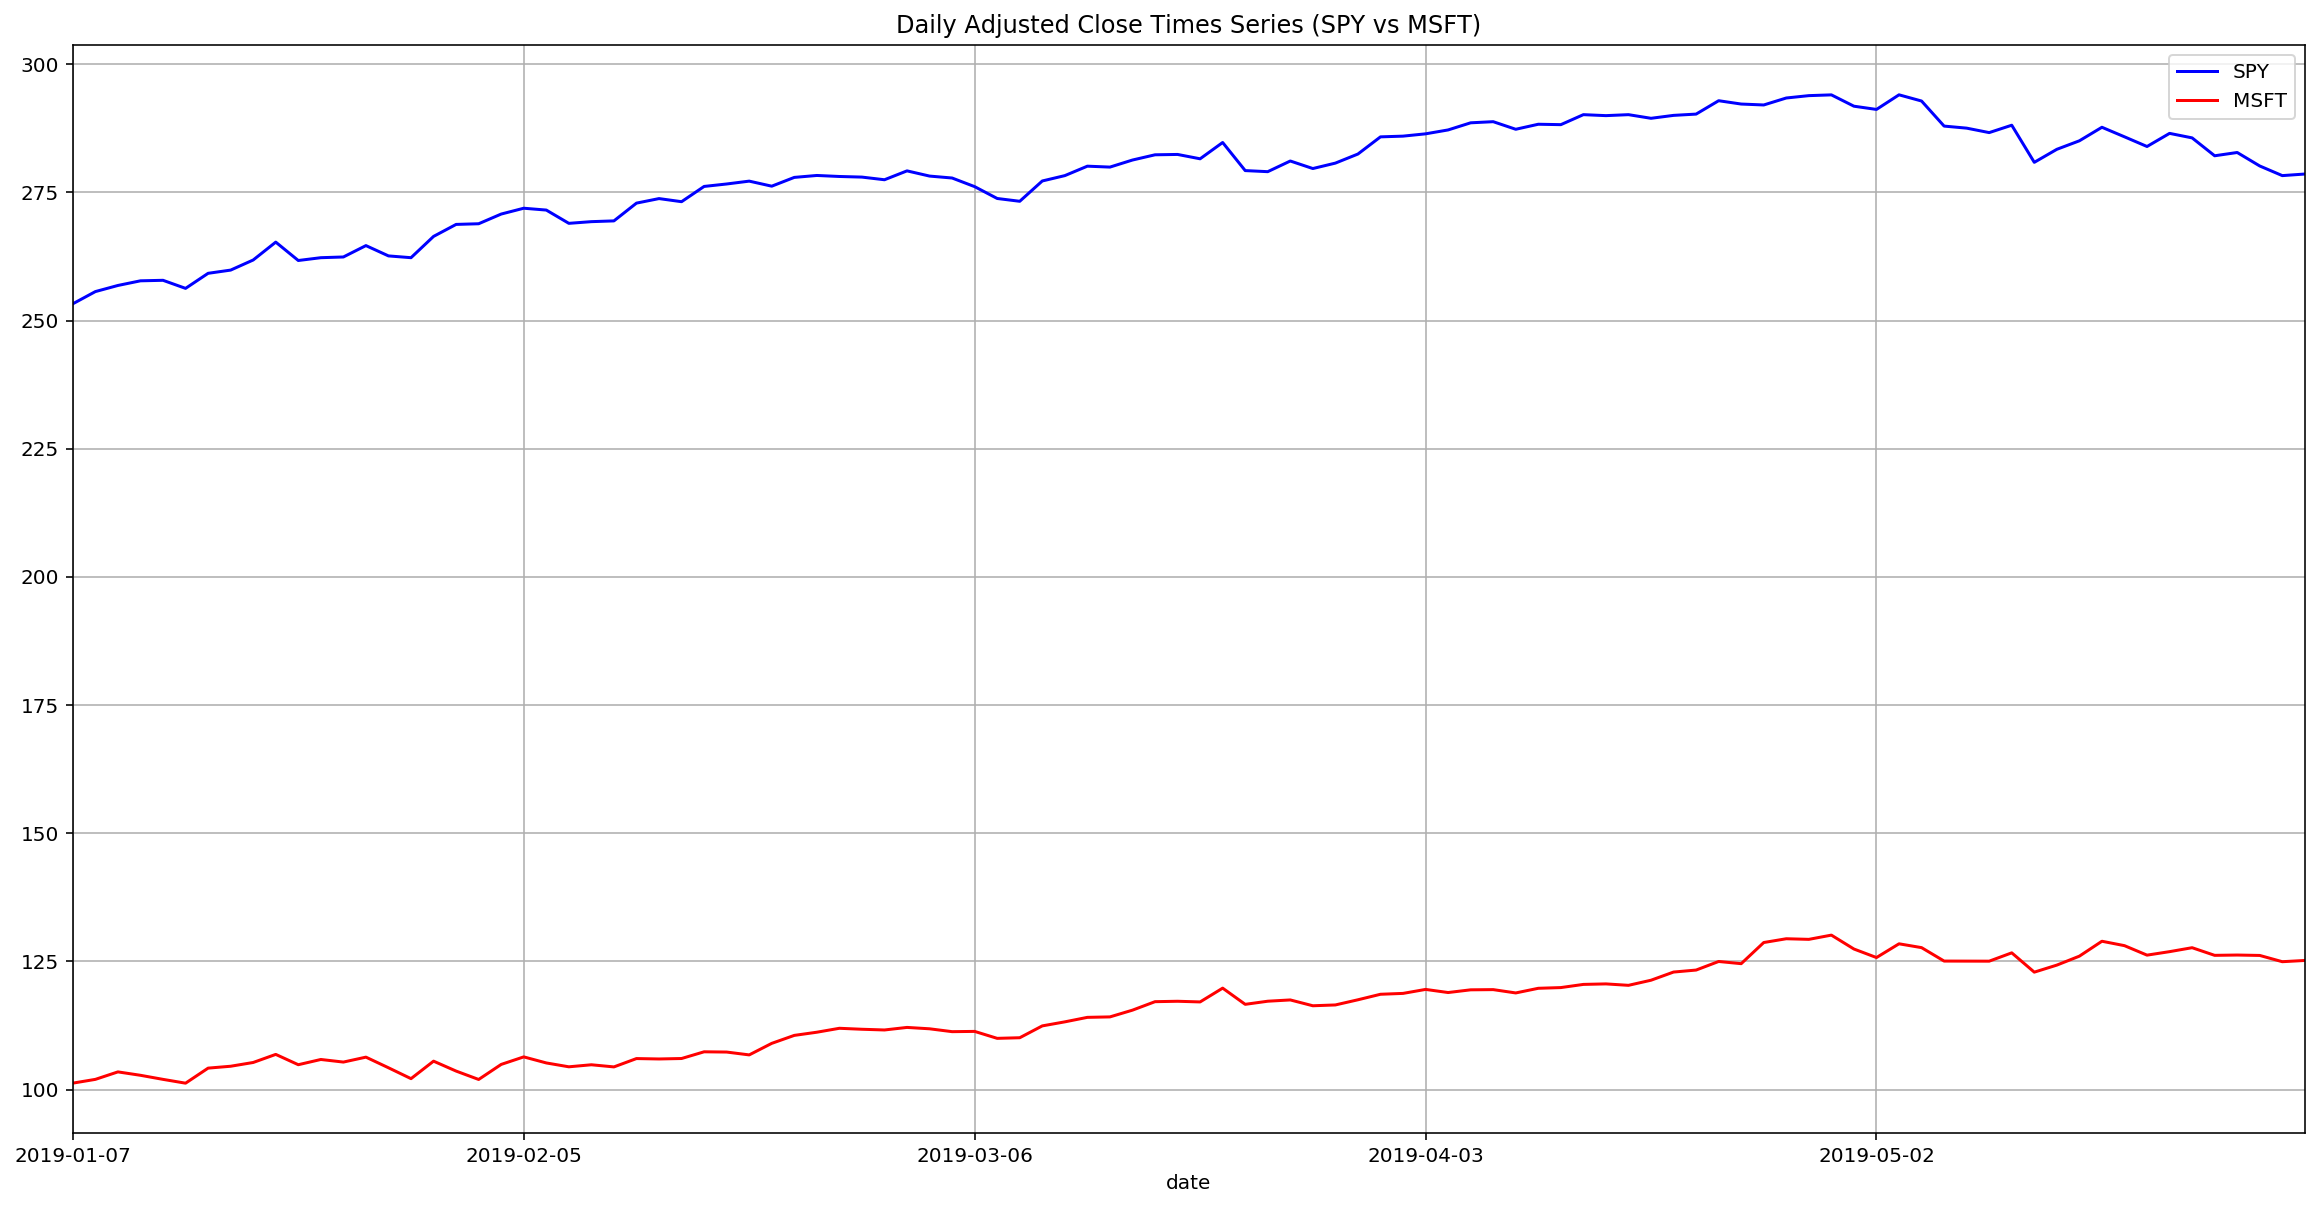

In [34]:
plt.title('Daily Adjusted Close Times Series (SPY vs MSFT)')
ax1 = SPY[0]['5. adjusted close'].plot(color='blue', grid=True, label='SPY')
ax2 = MSFT[0]['5. adjusted close'].plot(color='red', grid=True, label='MSFT')
plt.legend()
plt.show()

## Demonstrating Bollinger Bands

Bolling Bands are essentially a technical analysis tool that uses two standard deviations positively and negatively from the rolling mean (or simple moving average). It helps establish the volatility of a stock and expands during times of high volatility and contracts during times of low volatility. 

In [35]:
def r_mean(values, window=20):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window, center=False).mean()

def r_std(values, window=20):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window, center=False).std()

def bbands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper = rm + 2*rstd
    lower = rm - 2*rstd
    return (upper, lower)

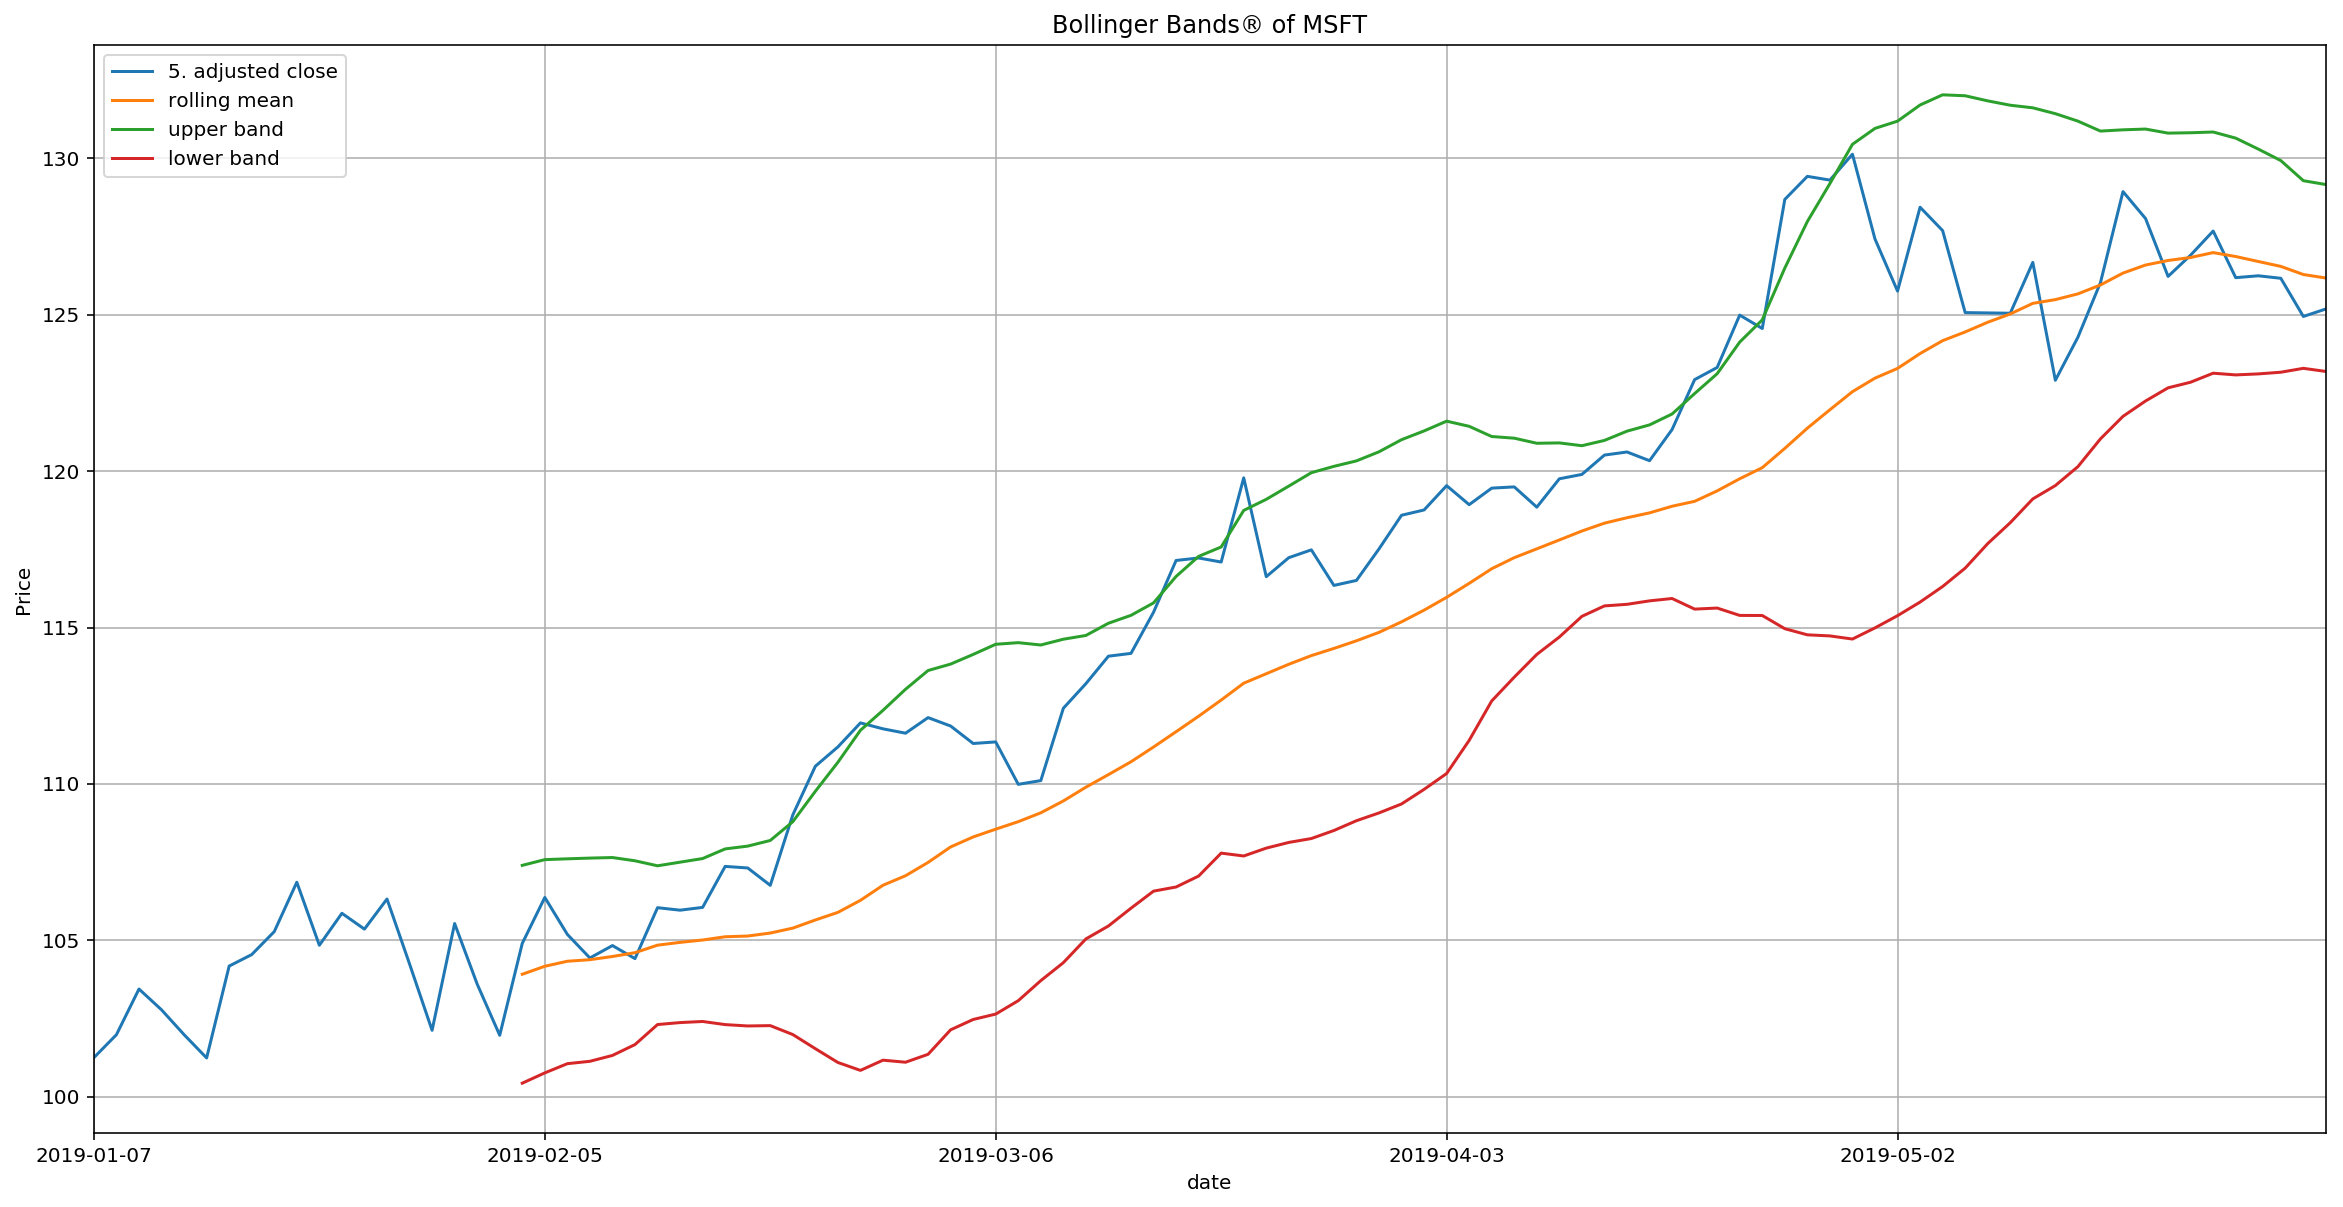

In [36]:
rm = r_mean(MSFT[0]['5. adjusted close'])
rstd = r_std(MSFT[0]['5. adjusted close'])
(upper, lower) = bbands(rm, rstd)

ax = MSFT[0]['5. adjusted close'].plot(title='Bollinger Bands' + u'\N{REGISTERED SIGN} of MSFT')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
rm.plot(label='rolling mean', ax=ax)
upper.plot(label='upper band', ax=ax)
lower.plot(label='lower band', ax=ax)
plt.legend()
plt.grid()
plt.show()

## Computing Average Daily Returns

To compute average daily return, all we had to do was compare the value of the stock to the day preceeding and subtracting 1 from it to compare these two values. We then calculated the mean to compute the average daily return.

In [37]:
def get_daily_returns(inputStock):
    """Compute and return the daily return values."""
    dr = inputStock.copy()
    dr[1:] = (inputStock[1:] / inputStock[:-1].values) - 1
    dr.iloc[0] = 0 #start daily return counter at 0
    return dr

print ("The daily average return is {0}".format(get_daily_returns(MSFT[0]['5. adjusted close']).mean()))

The daily average return is 0.0021977686224556956


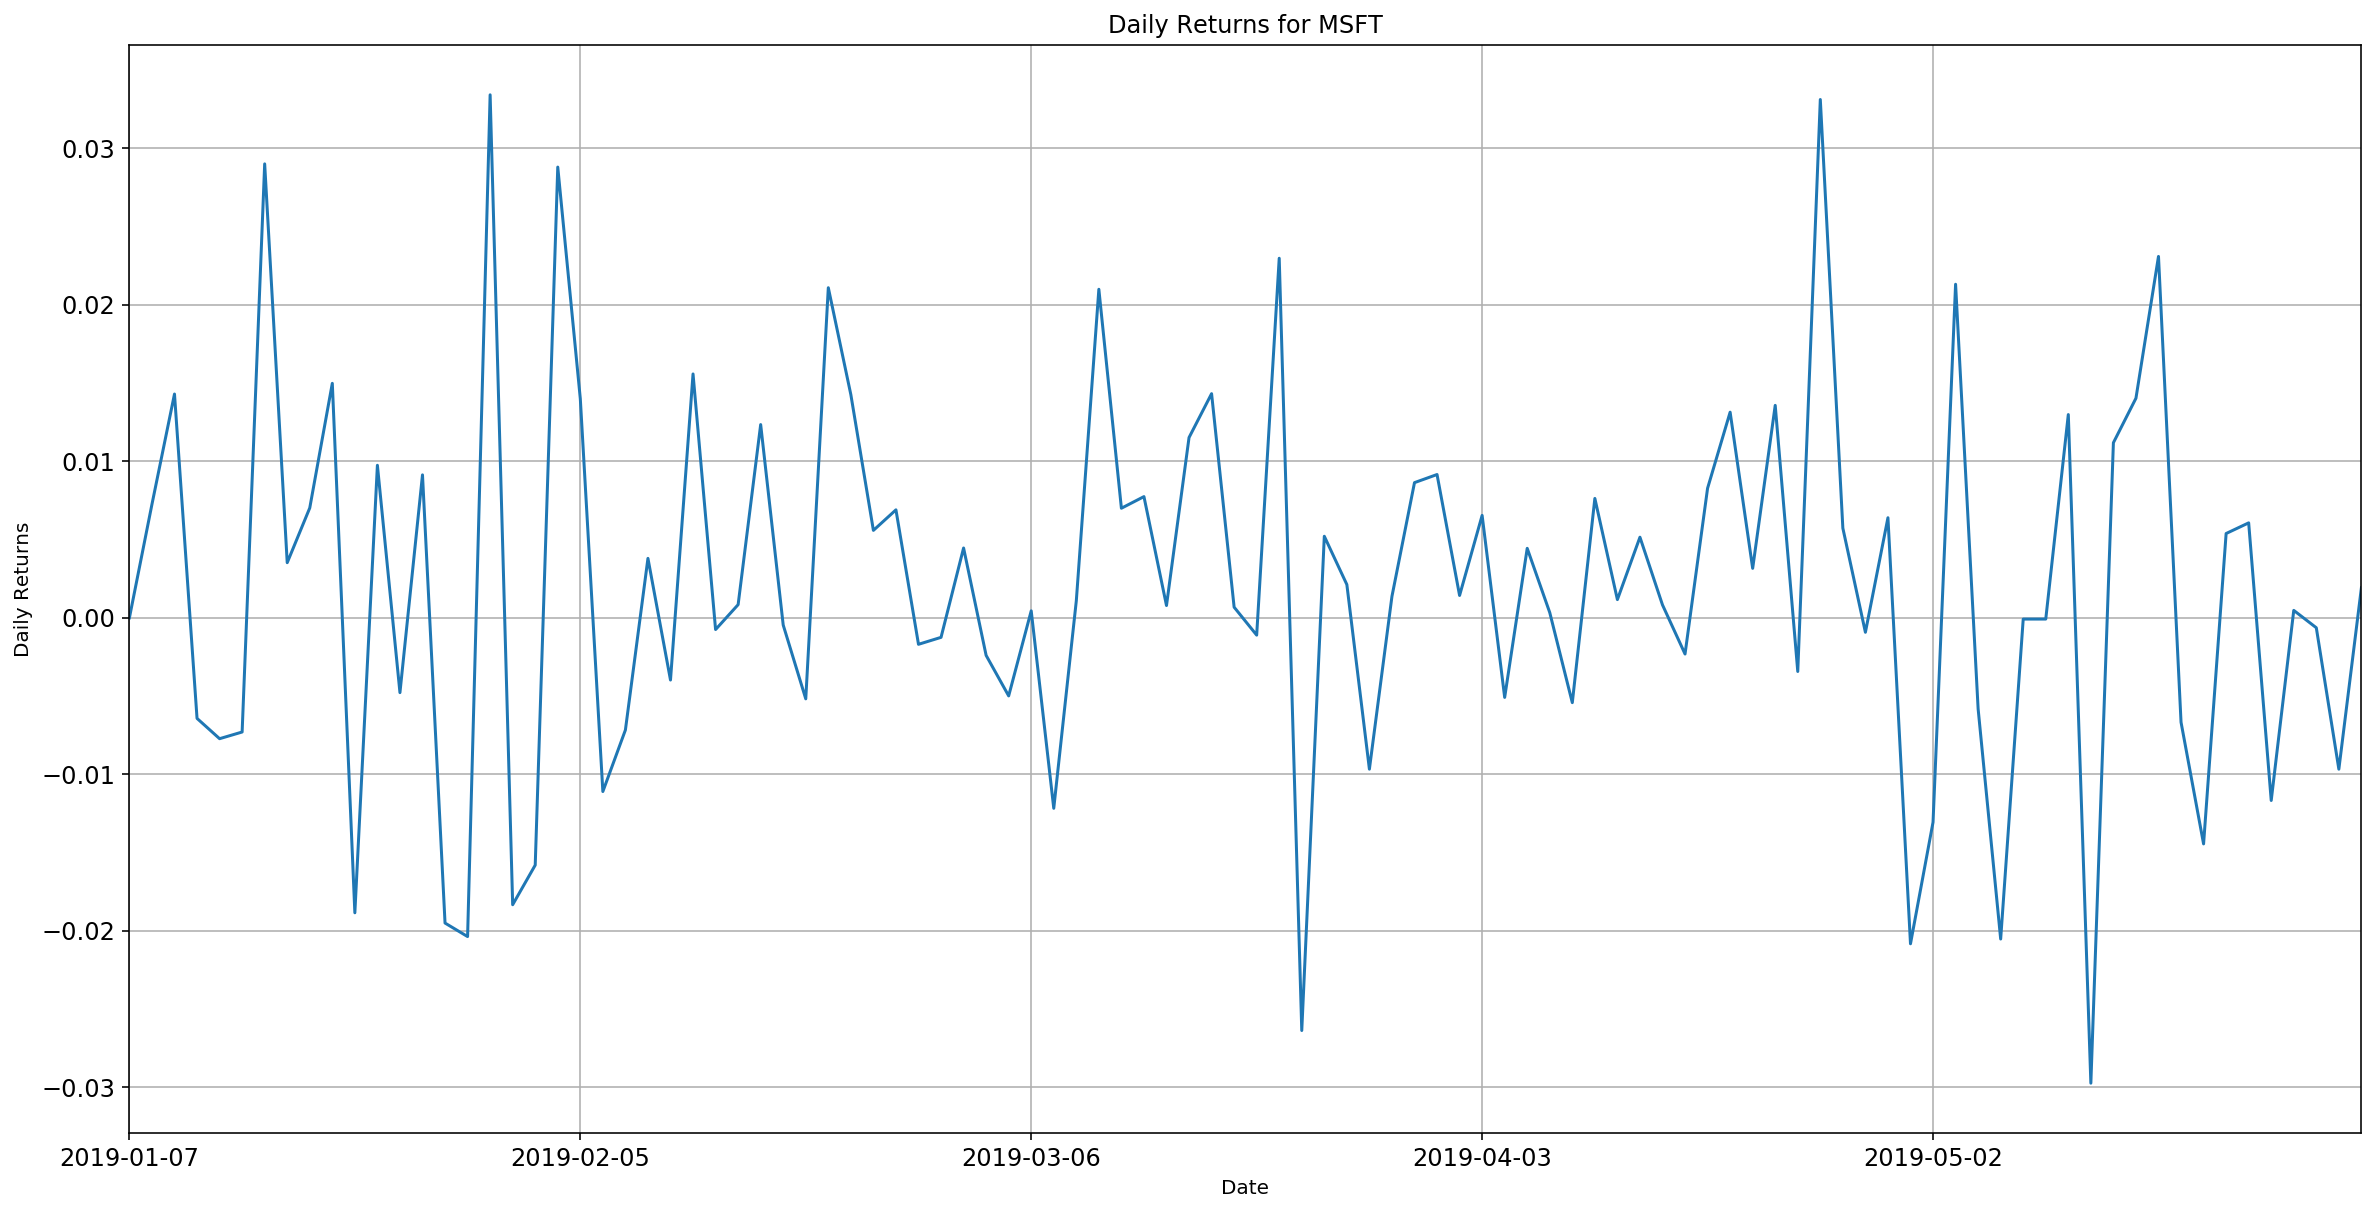

In [38]:
dr = get_daily_returns(MSFT[0]['5. adjusted close'])
ax = dr.plot(title='Daily Returns for MSFT', fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
plt.grid()
plt.show()

## Computing Cumulative Returns

Understanding cumulative returns involves a few things. To get returns, we apply the same logic as we did to computing average daily returns. Now to get the cumulative return, we apply numpy's builtin cumprod function to compute the cumulative returns for a given time period. 

In [39]:
def cumReturn(inputStock):
    stockClose = pd.Series(inputStock)

    returns = stockClose / stockClose.shift(1) - 1
    newReturns = (returns + 1).cumprod()[len(returns)-1] - 1
    
    return newReturns

print ("Cumualtive return for MSFT is {0}%".format(cumReturn(MSFT[0]['5. adjusted close'])*100))

Cumualtive return for MSFT is 23.629561667132435%


## Standard Deviation of Daily Returns

Standard deviation of daily returns is essentially a calculation of volatility. We can simply apply the built in standard deviation function on the daily return to determine this.

In [40]:
print("The Standard Deviation of Daily Returns is {0}.".format(dr.std()))

The Standard Deviation of Daily Returns is 0.012267459693947994.


## Sharpe Ratio 

Sharpe ratio is simply a calculation to determine the risk adjusted return. For our dataset consisting of 100 days worth of data, we simply took the square root of this timeframe and multiplied it by the mean of the daily return divided by the standard deviation of the daily return. 

A sharpe ratio can range a few ways:
- A ratio of 3 or greater, is considered excellent
- A ratio of 2, is considered good
- A ratio of 1, is considered acceptable
- A ratio of less than 1, is considered suboptimal

In [41]:
def sharpe_ratio(inputStock):
    
    dailyReturn =  get_daily_returns(MSFT[0]['5. adjusted close'])
        
    sr = np.sqrt(100) * (dailyReturn.mean() / dailyReturn.std())
    
    return sr

print("The daily sharpe_ratio is {0}.".format(sharpe_ratio(MSFT[0]['5. adjusted close'])))

The daily sharpe_ratio is 1.7915433816668163.


## Assessing an Entire Portfolio!

Now that we have the metrics, methodology and code in place to assess the performance of a stock. I think it's time we construct a portfolio and assess it!

### Function to Display Portfolio Statistics

Let's create a function to display some helpful statistics about our portfolio!

In [308]:
import time

#store data here to avoid API usage
stockDataList = []

def portfolioStatistics(inputStocks, stocksAlloc): 
    
    ts = TimeSeries(key='R9PCESGM8SQRD71G', output_format='pandas', indexing_type='date')    
    
    dailyReturn = 0
    sharpeRatio = 0
    stdDailyReturn = 0
    cumulativeReturn = 0
    stdDailyReturn = 0
    
    for stockName in inputStocks: #store data to a list so we don't abuse API call
        stockDataList.append(ts.get_daily_adjusted(stockName, outputsize='compact')[0]['5. adjusted close'])
        time.sleep(1) #delay to prevent timeout issues
        
    for x in range(len(inputStocks)):
        dailyReturn += get_daily_returns(stockDataList[x]).mean() * stocksAlloc[x]
        cumulativeReturn += cumReturn(stockDataList[x]) * stocksAlloc[x]
        stdDailyReturn += get_daily_returns(stockDataList[x]).std() * stocksAlloc[x]
        #print (get_daily_returns(stockDataList[x]).mean() * stocksAlloc[x])
        
    sharpeRatio = np.sqrt(100) * (dailyReturn/stdDailyReturn)
    
    print ("====================Welcome to your portfolio!====================")
    print ("Start Date: 2019-01-02")
    print ("End Date: 2019-05-24")
    print ("Stock Assets: {0}".format(inputStocks))
    print ("Stock Allocations: {0}".format(stocksAlloc))
    print ("Sharpe Ratio: {0}".format(sharpeRatio))
    print ("Volatility / std of daily returns: {0}".format(stdDailyReturn))
    print ("Average Daily Return: {0}".format(dailyReturn))
    print ("Cumulative Return: {0}".format(cumulativeReturn))
    print ("=========================Make some money!=========================")
    
            

inputStocks = ['MSFT','AAPL', 'GOOGL', 'TSLA']
stocksAlloc = [0.5,0.1,0.3,0.1]
portfolioStatistics(inputStocks, stocksAlloc)

====================Welcome to your portfolio!====================
Start Date: 2019-01-02
End Date: 2019-05-24
Stock Assets: ['MSFT', 'AAPL', 'GOOGL', 'TSLA']
Stock Allocations: [0.5, 0.1, 0.3, 0.1]
Sharpe Ratio: 0.6283575219671926
Volatility / std of daily returns: 0.015116670180924701
Average Daily Return: 0.0009498673415281198
Cumulative Return: 0.1107101658627812
=========================Make some money!=========================


### Function to Get Daily Portfolio Value

So to calculate the daily portfolio value, it involves a few things. 

1. We need to normalize the prices by dividing all the prices by the first row of prices.
2. We need to then multiply these normalized values by the allocation of stock units.
3. Next we multiply our allocated with the initial funds we are starting with.
4. Finally, we want to sum up these normalized values.

We'll be switching over to the yfinance python package for this one since it's easier to work with.

In [205]:
import yfinance as yf
portfolioData = yf.download("MSFT  AAPL  GOOGL  TSLA", start="2019-01-02", end="2019-05-24")

[*********************100%***********************]  4 of 4 downloaded


In [309]:
portfolioData['Adj Close'].head()

,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2019-01-02,156.64,1054.68,100.32,310.12
2019-01-03,141.04,1025.47,96.63,300.36
2019-01-04,147.06,1078.07,101.12,317.69
2019-01-07,146.73,1075.92,101.25,334.96
2019-01-08,149.53,1085.37,101.99,335.35


So first let's normalize the prices!

                AAPL     GOOGL      MSFT      TSLA
Date                                              
2019-01-02  1.000000  1.000000  1.000000  1.000000
2019-01-03  0.900409  0.972304  0.963218  0.968528
2019-01-04  0.938841  1.022177  1.007974  1.024410
2019-01-07  0.936734  1.020139  1.009270  1.080098
2019-01-08  0.954609  1.029099  1.016647  1.081356


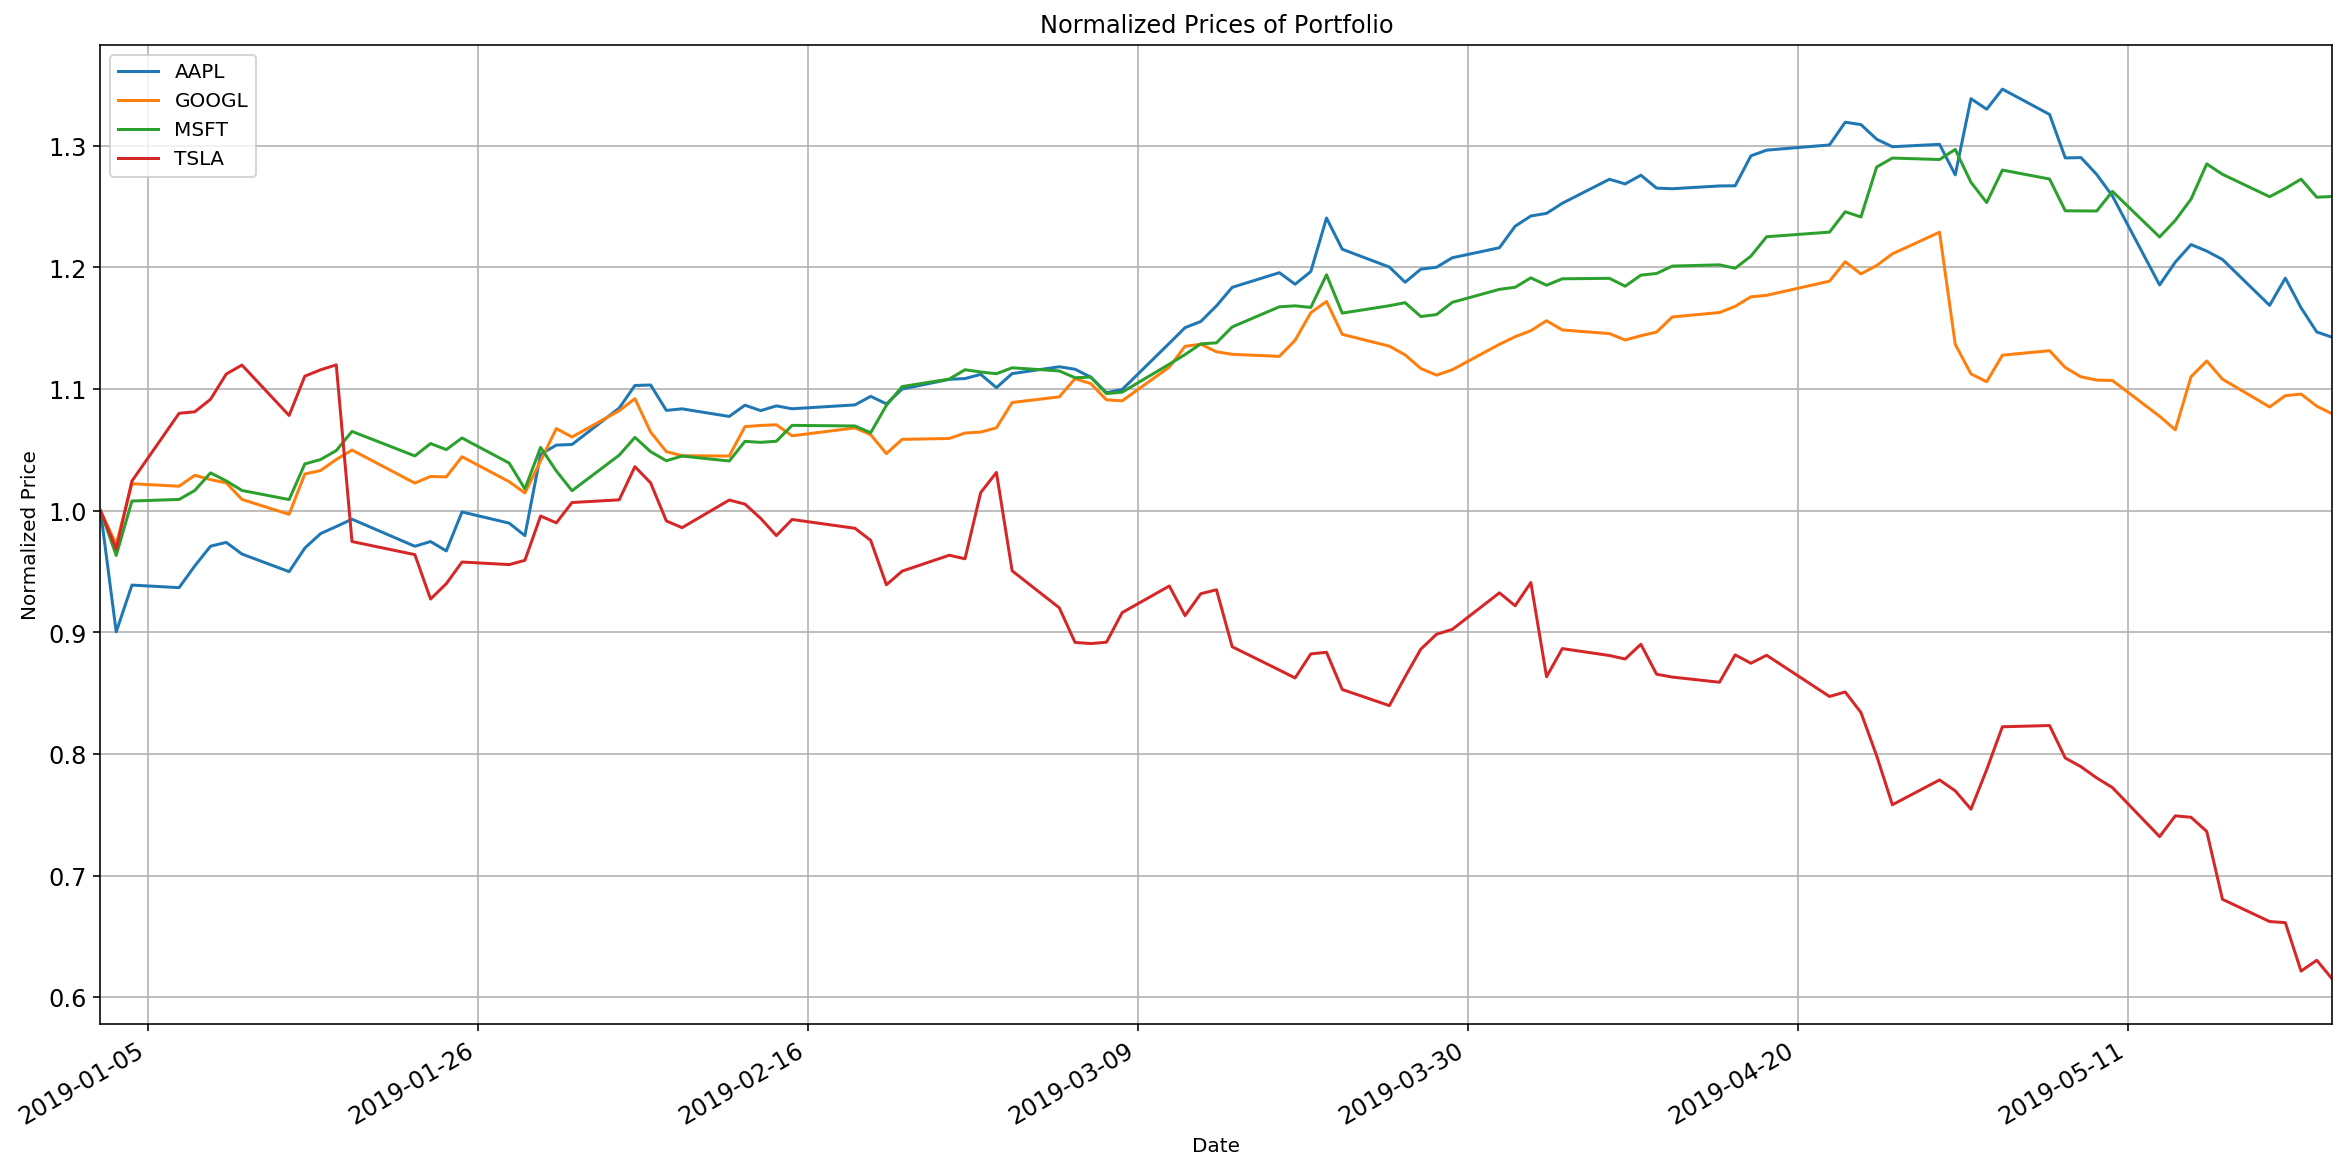

In [310]:
def get_normed_prices(prices):
    return prices / prices.iloc[0].values

normed = get_normed_prices(portfolioData['Adj Close'])
print(normed.head())

dr = normed
ax = dr.plot(title='Normalized Prices of Portfolio', fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price')
plt.grid()
plt.show()

Now let's allocate the prices by multiplying our stock allocations with the normalized price!

In [311]:
def get_alloced_prices(normed,allocs):
    return normed * allocs

alloced = get_alloced_prices(normed,stocksAlloc)
print(alloced.head())

                AAPL     GOOGL      MSFT      TSLA
Date                                              
2019-01-02  0.500000  0.100000  0.300000  0.100000
2019-01-03  0.450204  0.097230  0.288965  0.096853
2019-01-04  0.469420  0.102218  0.302392  0.102441
2019-01-07  0.468367  0.102014  0.302781  0.108010
2019-01-08  0.477305  0.102910  0.304994  0.108136


Now let's determine our actual portfolio value by attributing funds to buy our stocks.  We will put 10000 for now.

In [318]:
def get_pos_vals(alloced,start_val):
    return alloced * start_val

pos_vals = get_pos_vals(alloced,10000)
print(pos_vals.head())

                   AAPL        GOOGL         MSFT         TSLA
Date                                                          
2019-01-02  5000.000000  1000.000000  3000.000000  1000.000000
2019-01-03  4502.042901   972.304396  2889.653110   968.528312
2019-01-04  4694.203269  1022.177343  3023.923445  1024.409906
2019-01-07  4683.669561  1020.138810  3027.811005  1080.098027
2019-01-08  4773.046476  1029.098874  3049.940191  1081.355604


Now let's get our portfolio's actual value and chart it!

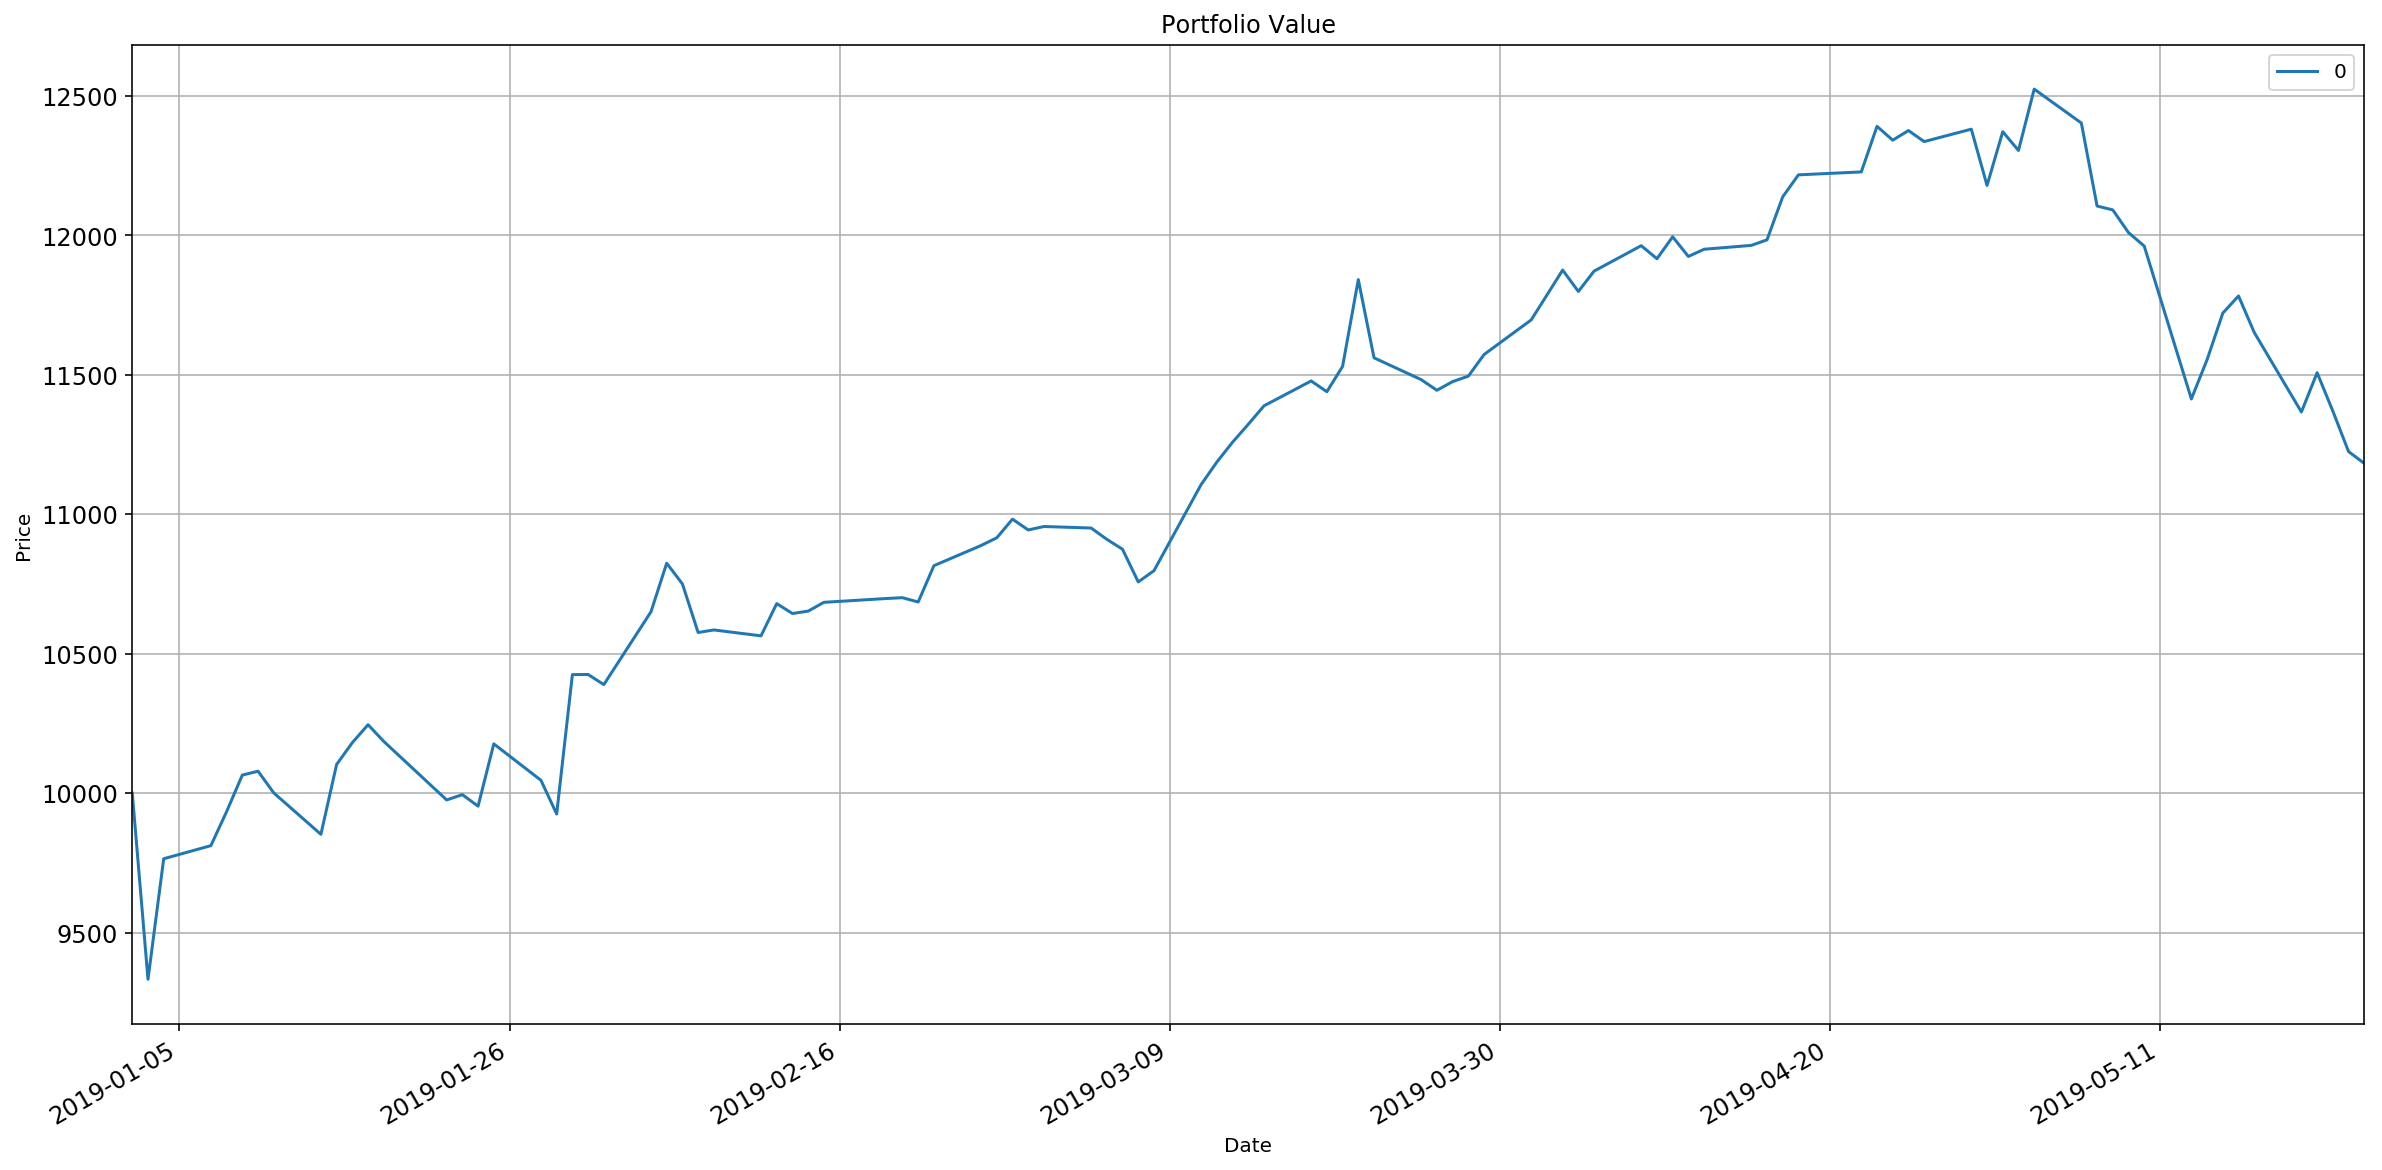

In [319]:
def get_portfolio_value(pos_vals):
    return pos_vals.sum(axis=1)

port_val = pd.DataFrame(get_portfolio_value(pos_vals))
dr = port_val
ax = dr.plot(title='Portfolio Value', fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.show()

### Benchmarking Our Portfolio

Finally, let's benchmark our portfolio against the SPY index.

In [235]:
portfolioBench = yf.download("SPY", start="2019-01-02", end="2019-05-24")

[*********************100%***********************]  1 of 1 downloaded


Here we run through the same code above but far more condensed. We put 10000 into the SPY alone.

In [323]:
benchNormed = (portfolioBench['Adj Close'] / portfolioBench['Adj Close'].iloc[0])
benchAlloced = get_alloced_prices(benchNormed,[1])
benchPosVal = pd.DataFrame(get_pos_vals(benchAlloced,10000))
benchPosVal.columns = ['SPY']
port_val.columns = ['Portfolio']

Let's combine the two portfolio dataframes. A simple pd.concat will do.

In [324]:
bigdata = pd.concat([benchPosVal, port_val],axis=1)

Double check tom make sure it was concatted correctly, joining on axis=1 is crucial (spent a lot of time here).

In [325]:
bigdata.head()

,SPY,Portfolio
Date,,
2019-01-02,10000.000000,10000.000000
2019-01-03,9761.522402,9332.528718
2019-01-04,10088.325036,9764.713962
2019-01-07,10167.817569,9811.717402
2019-01-08,10263.369199,9933.441145


Now let's finally compare our portfolio's performance against the SPY index!

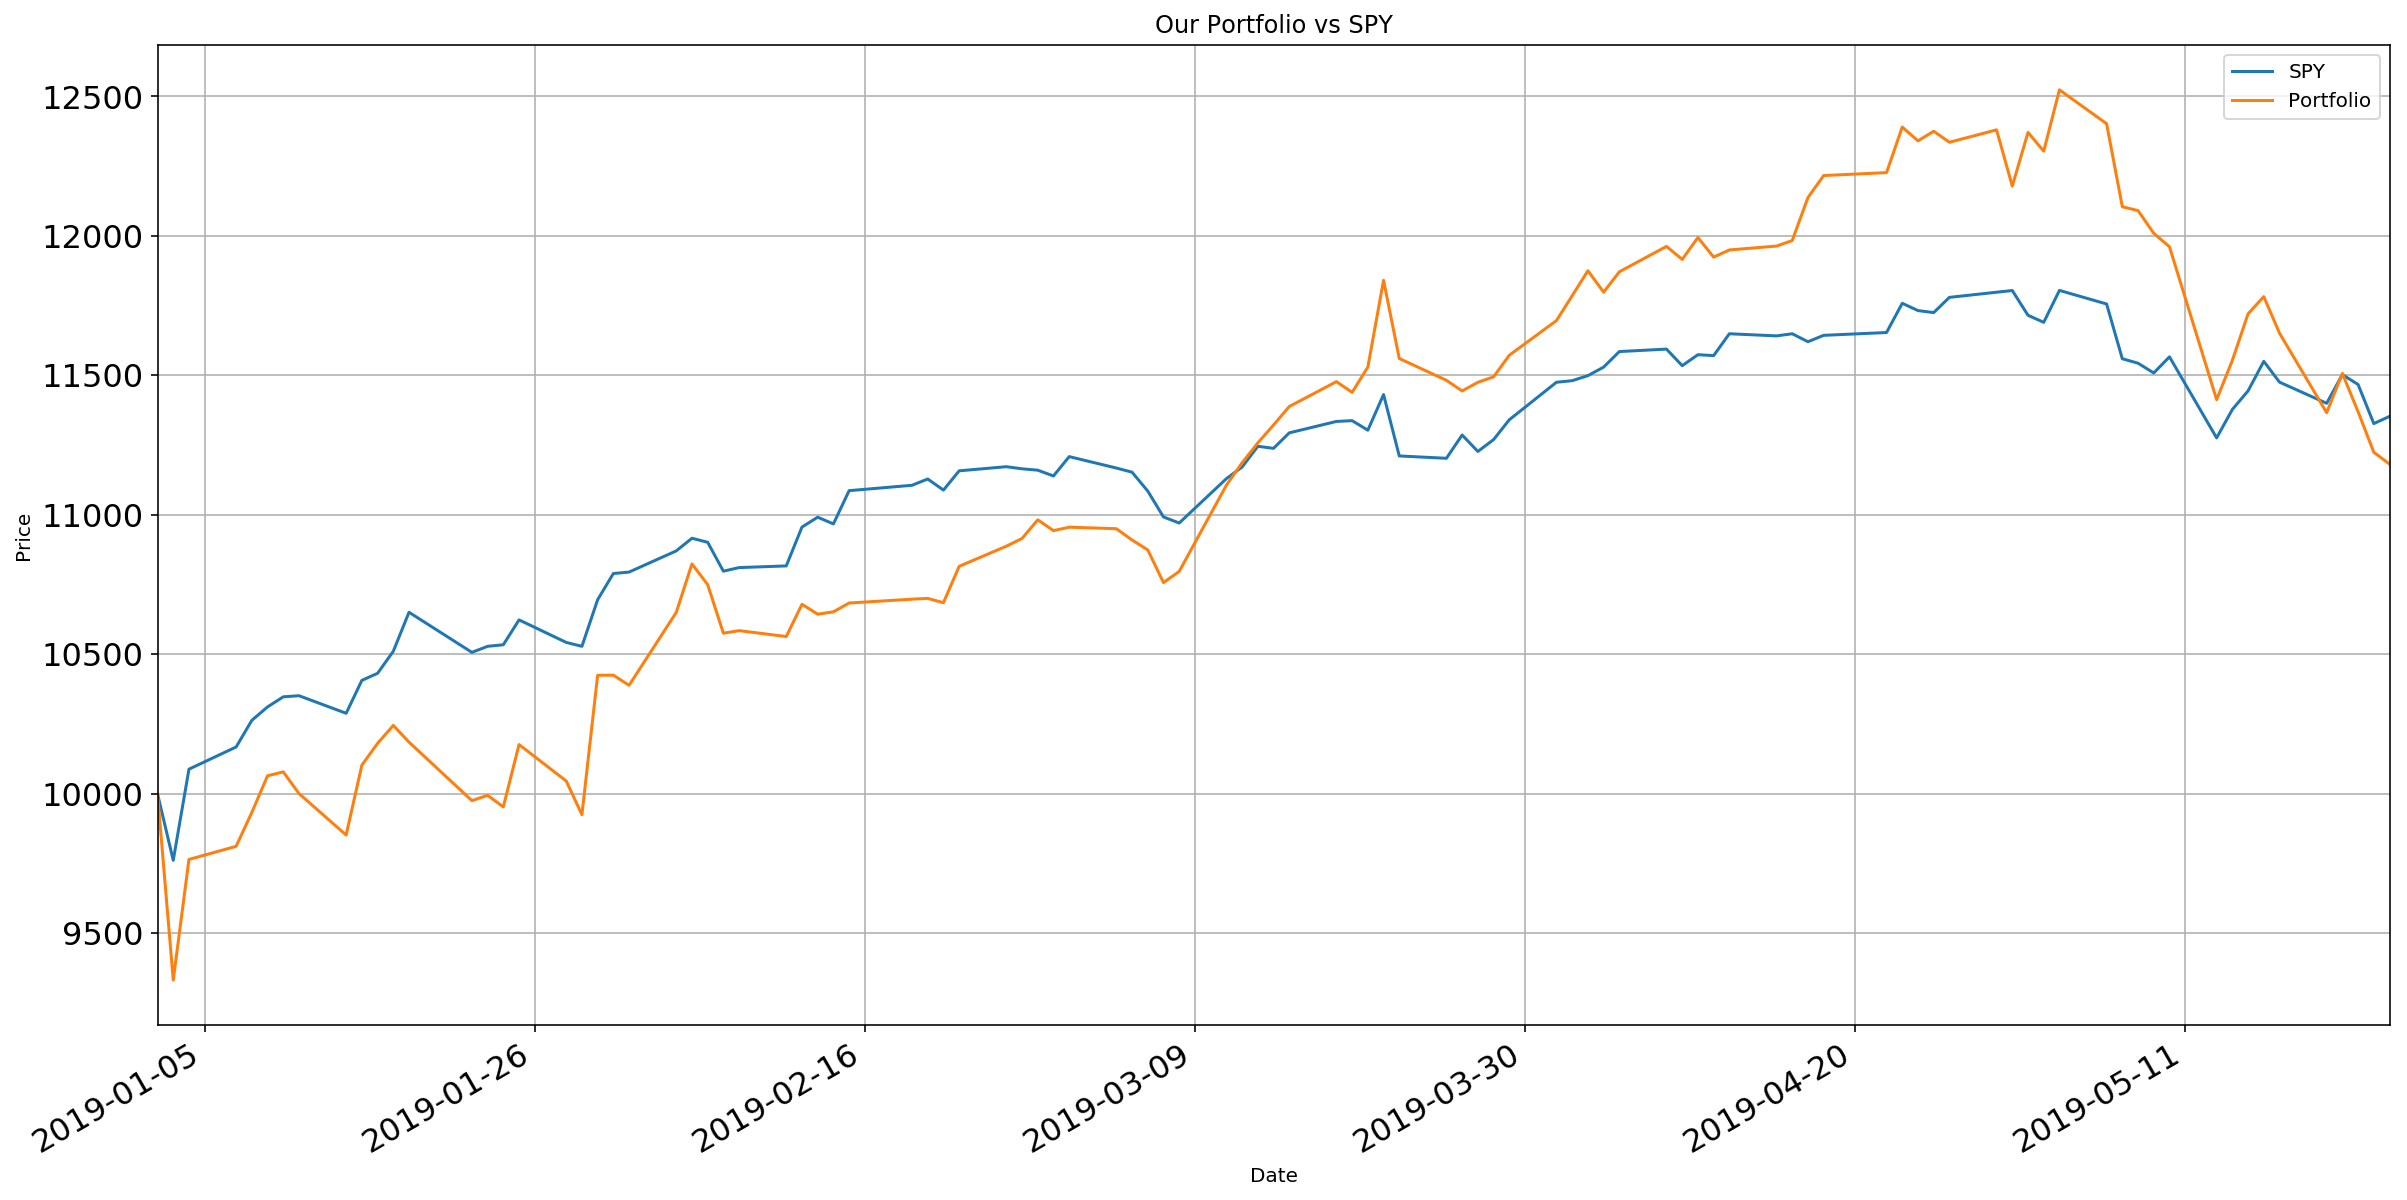

In [326]:
dr = bigdata
#dr = dr/dr.iloc[0,:] #normalize factor
ax = dr.plot(title='Our Portfolio vs SPY', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.show()

Now looking to the above chart, we see some interesting things stand out.

Initially, our portfolio's performance is not too stellar. Investing in the SPY alone would have provided more retruns.But around 2019-03-09, our portfolio picks up in value and actually takes over the SPY's performance. We see this continue until a little after 2019-05-11, where our portfolio dips just like the SPY and actually performs less than the SPY.

In the next project, I'll be focusing in on how to optimize a portfolio for better performance hopefully beat the SPY index!